# Overplot Sim and Data (No Gaps) <br/>
## @Milo
## December, 2017

# DATA

In [ ]:
# Darks
FitsDarks1 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_darks1.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/FOXSI-R_B/FOXSI-3_2017Sep17/X2/CCD/rawdata/ghostrays/rawdata/FOXSI3_X2_T6Sx6_CCD_darks2.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
Darks = (Darks1 + Darks2)*0.5
X0 = 886*0.0225
Y0 = 182*0.0225
scale = 46.08

# SIMULATION

In [1]:
from foxsisim.util import load_rays
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Mrays1 = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/rays_on_module_1M.csv')
Mrays2 = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/rays_on_module_1M_2.csv')
Mrays3 = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/rays_on_module_1M_3.csv')
Mrays = Mrays1 + Mrays2 + Mrays3
print('Number of rays0 : {:d}'.format(len(Mrays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/rays_on_module_1M.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/rays_on_module_1M_2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/rays_on_module_1M_3.csv loaded.
Number of rays0 : 2798550


In [8]:
# Create detector:
from foxsisim.detector import Detector
detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in Mrays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
detector.catchRays(Mrays)

In [9]:
Drays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==2 )]
Srays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==1 )]
Hrays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

sim_scale = 1.0    # 1cm = 17.4 arcmin
#sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
    

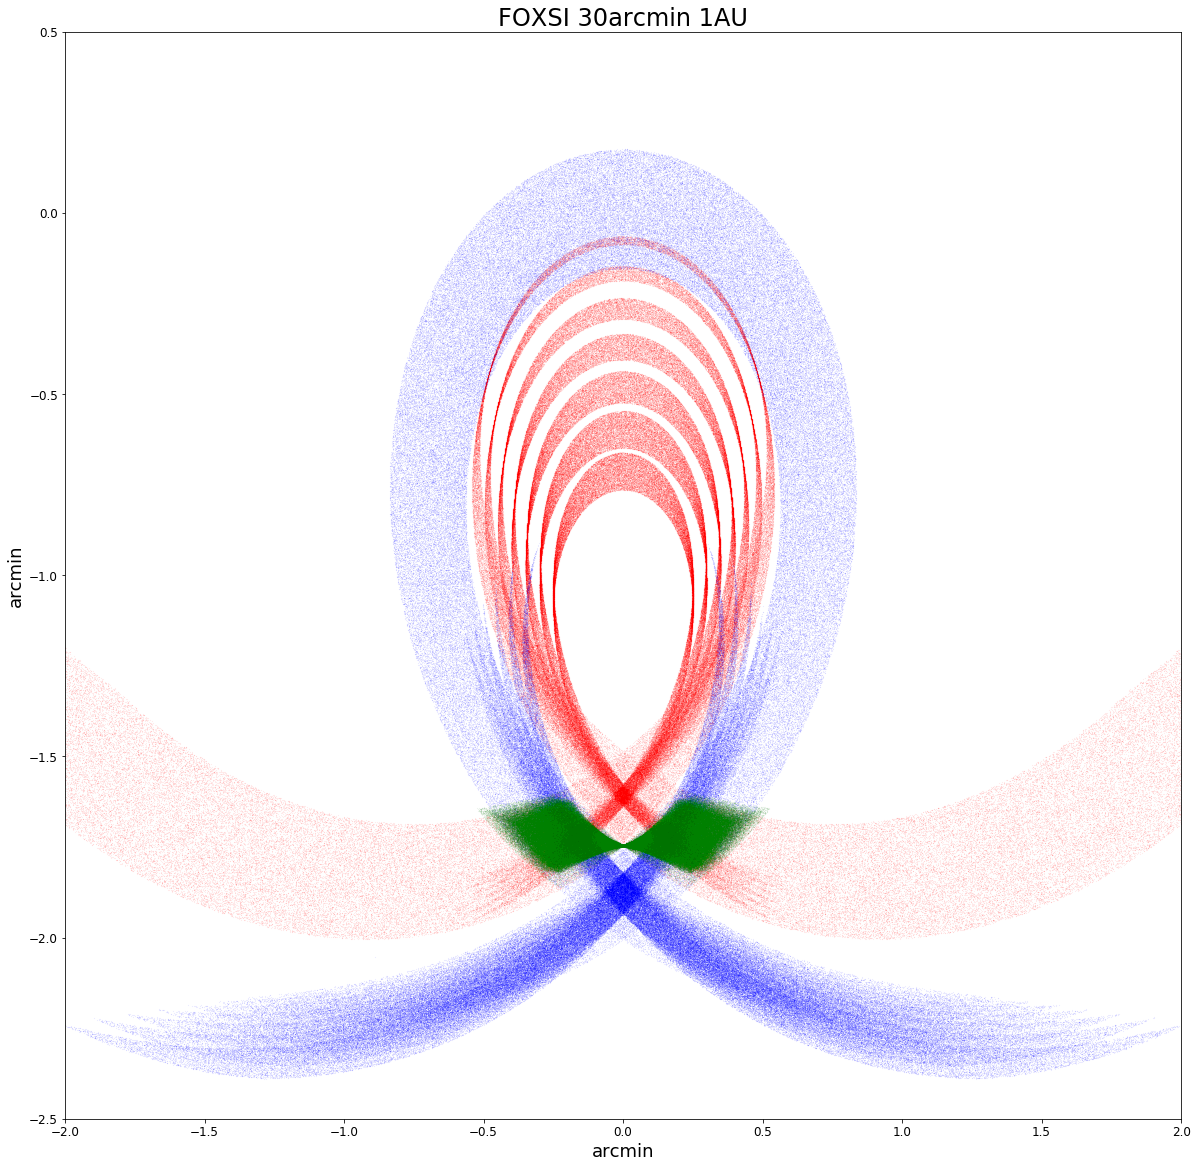

In [10]:
fig = plt.figure(figsize=(20,20))
plt.title('FOXSI 30arcmin 1AU',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(Hx,Hy,color='red',s=0.001,alpha=0.8)
plt.scatter(Px,Py,color='blue',s=0.001,alpha=0.8)
plt.scatter(Dx,Dy,color='green',s=0.001,alpha=0.8)
plt.ylim(-2.5,0.5)
plt.xlim(-2.,2.)
plt.show()